# Lesson 2 - Intro to Python `str` and `list`

When raw data is read in from a file, the result will often be either a long string or a list of strings, depending on how the file is read. 

We will start with the most basic method: read all data from the file as one long string.

# Reading `str` data from a file

## Basic recipe

The most common and safest way of opening a file in Python is with the following recipe.

```python
file_name = "README.md" # Same dir as notebook file
with open(file_name, 'r') as file:
    file_data = file.read()
```

Once that code has run, the variable `file_data` is now a string representing all of the text in the file.

You can see the contents of the file data by doing:
```python
print(file_data)
```

In [2]:
file_name = "README.md" # Same dir as notebook file
with open(file_name, 'r') as file:
    file_data = file.read()

In [7]:
print(file_data)

# Welcome to Lesson 02

Download this repository by clicking the big, green "Code" button above to
download the .zip file. Extract it into your "Notebooks" directory and open
it in JupyterLab.



## Understanding the recipe

### 1. Set your file name as a str

```python
file_name = "my_file.txt"
```

This str represents a _path_ to a file on your computer that you want to open.

By just passing a file name, instead of a full path, the assumption is that your file is in the same directory as your notebook.

While the file can have any file extension, the actual data in the file must be _text data_.

### 2. The `open()` function

The function we are using is called, `open`. It is one of the built-in Python functions. 

The function, `open()` takes one _mandatory_ argument and several _optional_ arguments. For now, we will use the one mandatory argument, `file`, and one of the optional arguments, `mode`.
* `file` -> This is your file name. Can be a `str` or "path-like object" (more next week)
* `mode` -> There are four basic modes:
    * `'r'` - Reading (text) mode
    * `'w'` - Writing (text) mode
    * `'rb'` - Reading binary mode
    * `'wb'` - Writing binary mode

We will just be using `'r'` and `'w'` modes in this course. 

If you do not provide a `mode` argument, Python will assume it is `'r'`

### 3. Using `with ___ as ___:`

Opening a file like this:
```python
with open(file_name, 'r') as file:
    file_data = file.read()
```

Is roughly equivalent to doing this:

```python
file = open(file_name, 'r')
file_data = file.read()
file.close()
```

The reason we (the Python community) prefer the former to the latter is to make sure the file is always _closed_. 

If some kind of error is generated by `file.read()` in the latter approach, then the call to `file.close()` will be interrupted and the file will remain "open" as far as the operating system is concerned.

The `with ... as ...:` syntax is called a _context manager_. The characteristics of a context manager is that there is some code that is automatically run when _entering_ the context scope and some more code run when _exiting_ the context scope.

By using `with ... as ...`, the file will _always_ be closed, even if there is an error writing to the file, because the `file.close()` is part of the code that is automatically run when _exiting_ the context scope.

In [16]:
file_data

'# Welcome to Lesson 02\n\nDownload this repository by clicking the big, green "Code" button above to\ndownload the .zip file. Extract it into your "Notebooks" directory and open\nit in JupyterLab.\n'

# Working with `str` data: Words and Text

Strings (`str`) types are one of the most common data types to use in Python. Most data that we read from external sources will be interpreted by Python as strings of characters, `str`.

To recap, we can make strings by putting quotes around **anything**.

```python
a = "This is a string" # You can use double quotes
b = 'This is a string, too' # Or single quotes
```

These are also strings:
```python
c = "34.5" # This is a str, not a float
d = "28" # This is a str, not an int
e = 'print(2 + 4**3)' # This is a str, not a function call
```

Strings have some special characters that are known as "escaped" characters. Escaped characters start with a backslash `\`.

* `'\n'`: New line character
* `'\t'`: Tab character
* `'\r'`: Carriage return character (brings the "cursor" to the "beginning of the line")
* `'\b'`: Backspace

To actually write a backslash in your string, you have to "escape" the backslash: `"\\"`

In [21]:
c = "34.5" # This is a str, not a float
d = "28" # This is a str, not an int
e = 'print(2 + 4**3)\nMore text here' # This is a str, not a function call

In [23]:
e

'print(2 + 4**3)\nMore text here'

## Representations vs Renderings

With `str`, and other kinds of objects, you can see it in one of two ways:
1. The object's "representation" or ("repr")
2. The object's "rendering"

```python
my_str = "This is a string\nsplit over\nthree lines"
my_str
```

vs.

```python
print(my_str)
```

* The "repr" is viewable whenever you "inspect" an object on the command line or when you use the `repr()` function.
* The "rendering", for a `str`, is viewable whenever you use `print()` or when you write the string to a file.

In [24]:
my_str = "This is a string\nsplit over\nthree lines"
my_str

'This is a string\nsplit over\nthree lines'

In [25]:
print(my_str)

This is a string
split over
three lines


## A brief note about string encoding

Nowadays, we expect computers to be able to work with ANY character set. The old Latin encodings of ANSI and ASCII are not capable of this so the encoding `UTF-8` was created in 1992 to accomplish this. 

UTF-8 is the default encoding in Python but it is possible to access other encodings if you encounter data that have different encodings.

```python
# These strings demonstrate Python's utf-8 encodings

f = "如果您可以阅读此内容，则本课程似乎进展顺利。"
g = "إذا كنت تستطيع قراءة هذا ، يبدو أن هذا الدرس يسير على ما يرام."
h = "यदि आप इसे पढ़ सकते हैं, तो ऐसा लगता है कि यह पाठ ठीक चल रहा है।"
j = "ប្រសិនបើអ្នកអាចអានវាហាក់ដូចជាមេរៀននេះដំណើរការល្អ។"
k = "😀"
```


## Types of strings: raw string ("r-string")

This is a string. Notice how backslashes have been _escaped_.

```python
file_path = "C:\\Users\\cferster\\my_file.txt"
```

This is a raw string. Notice how backslashes are just typed like you would normally see in a Windows file path. They have _not_ been escaped.

```python
file_path = r"C:\Users\cferster\my_file.txt"
```

Sometimes, especially with Windows paths, using a raw string can be convenient. However, to put tabs or newline characters into the string, you should use a normal string with escaped characters `\t` and `\n`, respectively.

In [35]:
file_path = r"C:\Users\cferster\my_file.txt"

## Types of strings: formatted string ("f-string")

### Formatted string ("f-string")

Wouldn't it be nice to be able to calculate some numerical value and plop into into the middle of your string? Something like:

```python
b = 300
h = 460

S_x = b * h**2 / 6
```

Using f-strings, you can do just that. Like this:

```python
b = 300
h = 460

S_x = b * h**2 / 6

print(f"The section modulus is: {S_x}")
```

In [38]:
b = 300
h = 460

S_x = b * h**2 / 6

In [43]:
print(f"The section modulus is: {S_x}")

The section modulus is: 10580000.0


Formatted strings allow you to put information from variables into strings.

### Another example

```python
col_width = 300
col_depth = 600

col_section = f"COL{col_width}x{col_depth}FC45"
print(col_section) # COL300x600FC45
```

### Using `{...}`

With an f-string, you put the value of your variable directly in the string where you want it with _braces_ (`{` and `}`). However, instead of just a variable name, you can also enter any Python _expression_ (a combination of symbols that can be evaluated down to a single value), e.g. 

```python
col_width = 300
col_depth = 600

col_section = f"COL{col_width / 7}x{col_depth / 7}FC45" # This can also work
```

In [58]:
beam_span = 3632454654654564.45454 # meters

In [59]:
beam_span
f"The beam is {beam_span:.3g} meters long"

'The beam is 3.63e+15 meters long'

### Formatting strings - options

Using f-strings, you can adjust how numbers are formatted in the rendered string. For example, you can adjust how many decimals of precision are displayed or whether to display then in scientific notation (for `float`s).

### Examples

```python
beam_span = 3.6324 # meters

print(f"The beam is {beam_span} meters long")
print(f"The beam is {beam_span:.6f} meters long")
print(f"The beam is {beam_span:.6e} meters long")
print(f"The beam is {beam_span:.6g} meters long")
```

### Understanding the syntax

`f"{variable:.<precision><format code>}"`

1. Your variable goes in between braces `{...}`
2. Use a colon `:` to separate your variable name from the formatting codes
3. `.<precision>` is used to describe how many decimal places of precision to use
4. The formatting code can be any of the following:
    1. No formatting code, `f"{variable:.6}"` - 6 decimals precision but only if the number has 6 decimals of precision (no zero-padding)
    2. `f`, `f"{variable:.6f}"` - 6 decimals precision and fill in with zeros if the number has less than 6 decimals precision (zero-padding)
    3. `e`, `f"{variable:.6e}"` - Scientific notation with 6 decimals precision with zero-padding
    4. `g`, `f"{variable:.6g}"` - Uses scientific notation if appropriate wtih 6 decimals precision with no zero-padding


#### There are more string formatting options...

...but this course will only cover the most common formatting options one might use in engineering.

If you are interested in understanding ALL of the string formatting options (particularly useful if you are writing tools or programs that are meant to be used on the command line), please [see this article](https://realpython.com/python-formatted-output/#the-string-format-method-simple-replacement-fields) for more information.

# Collections of data: `list`

A `list` is a collection of Python objects that can be anything you like:

```python
beam_sections = ["215x608-24fE", "315x836-24fEx", "315x722-24fE"]
beam_spans = [1140, 4500, 3840, 2080]
```

A `list` can also contain other lists:

```python
multiple_beams = [[3600], [1140, 4500], [3840, 5600, 4200]] # Each sub-list might represent spans in a beam
nested_beam = [[[3600]]] # A list of one element, in a list in a list
```

# What `str` and `list` have in common

Both `str` and `list` are considered _sequences_. In Python, another word for "sequence" is _**iterable**_. 

* A `str` is an iterable of individual characters
* A `list` is an iterable of other objects, which may be `str`, `int`, `float`, `bool`, other `list`s, or whatever.

### Because `str` and `list` are both sequences, they have certain useful traits in common:

### 1. Indexing
### 2. Combinations with `+` and `*`
### 3. Methods

# 1. Indexing

Both characters in a `str` and objects in a `list` can be _indexed_. This means we can access individual _members_ of the `str` or `list` if we know their position within the `str` or `list`.

```python
column_section = "COL300x600FC45"
column_sections = ["COL300x600FC45", "COL400x600FC45", "COL600x600FC34"]
```

```python
column_section[0] # This accesses the first character in the str
column_sections[2] # This accesses the third object in the list
```

In [2]:
column_section = "COL300x600FC45"

In [3]:
column_sections = ["COL300x600FC45", "COL400x600FC45", "COL600x600FC34"]

In [4]:
column_section [0]

'C'

In [71]:
column_sections[0]

'COL300x600FC45'

However, `int`s and `float`s are not indexable (aka "subscriptable"):
```python
some_float = 234.234009234
some_int = 8982389482
```

```python
some_float[1] # This won't work to get the second number
some_int[5] # This won't work either (to get the sixth number)
```

```python
some_float = "234.234009234" # Now these are indexable
some_int = "8982389482" # Now these are indexable
```

In [77]:
some_int = 8982389482

In [78]:
some_int

8982389482

In [79]:
str(some_int)[2]

'8'

### Note: Python is "zero indexed"
Python is what is called a "zero indexed" language. This means that all numbering starts from `0` and goes up. The item in the first position is indexed with `0`.

### Indexing syntax `[start:stop:step]`

Indexing is not just used to get single members of a sequence. It can be used to get a range of members or some selection of members.

Here are examples:
```python
column_section = "COL300x400FC45"

column_section[3:6] # 300
column_section[7:10] # 400
```

In [80]:
column_section = "COL300x400FC45"

In [89]:
width = float(column_section[3:6])

In [90]:
depth = float(column_section[7:10])

In [102]:
column_section[-2:]

'45'

This example shows indexing used to get individual items from a list.


```python
beam_sections = ["215x608-24fE", "315x836-24fEx", "315x722-24fE", "215x570-24fE"]

beam_sections[2] # "315x722-24fE"
beam_sections[0] # "215x608-24fE"
```



In [92]:
beam_sections = ["215x608-24fE", "315x836-24fEx", "315x722-24fE", "215x570-24fE"]

In [97]:
beam_sections[-2]

'315x722-24fE'

This is an example of how we can use the `step` parameter to get specific sub-sequences

```python
numbers_0_thru_20 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
two_times_table = numbers_0_thru_20[0::2] # Read as "start at position zero, do not stop, every 2nd item"
two_times_table # [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
```

In [103]:
numbers_0_thru_20 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [114]:
numbers_0_thru_20[-2:-5:-2]

[19, 17]

### Understanding `[start:stop:step]`

* `[x]` - Get the item at position `x`
* `[x:y]` - Get the items starting at `x` and stop BEFORE `y` (i.e., does not include position `y`)
* `[x:y:z]` - Get the items start at `x` and stop before `y` retrieving every `z`th item.

#### Variations
* `[x:]` - Get the items starting at `x` and do not stop
* `[x::]` - Get the items starting at `x` and do not stop, retrieving every item (effectively same as above so you wouldn't write this)
* `[x::z]` - Get the items starting at `x` and do not stop, retrieving every `z`th item
* `[::z]` - Get the items starting at the beginning, do not stop, retrieving every `z`th item

#### Going backwards
* `[-1]` - Get the last item
* `[-2]` - Get the second-to-last item
* `[::-1]` - Reverse the list (step through every item in reverse)
* `[-2:-5:-1]` - Start at the second-to-last position, stop before the fifth-to-last position, retrieving every item going backward
* `[-2:-5:-2]` - Start at the second-to-last position, stop before the fifth-to-last position, retrieving every second item going backward

# 2. Add items with `+` and `*`

The `+` and `*` operators, in addition to being used with numbers, can be used on `str` and `list`. However, `-` and `/` cannot be.

Explanation by examples:

```python
col_tag = "COL"
col_tag * 3 # COLCOLCOL

column_sections = ["COL300x600FC45", "COL300x900FC45"]
column_sections * 2 # ["COL300x600FC45", "COL300x900FC45", "COL300x600FC45", "COL300x900FC45"]
```

```python
col_width = "300"
col_depth = "600"
fc = "FC45"

column_section = col_tag + col_width + "x" + col_depth + fc
```

> Note: While we can "build" strings from individual string parts using the `+` operator, it is much more readable to use _f-strings_

In [126]:
column_sections = ["COL300x600FC45", "COL300x900FC45"]
col_tag = "COL"
col_width = "300"
col_depth = "600"
fc = "FC45"

In [127]:
column_section = col_tag+col_width+"x"+col_depth+fc

In [129]:
f"{col_tag}{col_width}x{col_depth}{fc}"

'COL300x600FC45'

# 3. Built-in _methods_

In Lesson 1 and Workbook 1, we were introduced to the idea of _functions_ and how to "call" them. 

**A _method_ is like a function that is "bundled with" a particular data type.**

### Example of using a str method, `.upper()`:
```python
col_section = "col300x400fc45"
col_section.upper() # COL300X400FC45
```

The method `.upper()` is specific to strings only. Therefore, instead of making it a stand-alone function that only operates on string inputs, a _method_ was created on the string data type that allows it to make the string data upper-case.

In [131]:
beam_label = "beam"

In [132]:
beam_label.upper()

'BEAM'

### Example of using a list method, `.append()`:

```python
beam_sections = ["215x608-24fE", "315x836-24fEx"]
beam_sections.append("315x722-24fE")
beam_sections # ["215x608-24fE", "315x836-24fEx", "315x722-24fE"]
```

The method `.append()` is a method specific to lists. It adds an item on to the _end_ of the list.

In [157]:
beam_sections = ["215x608-24fE", "315x836-24fEx"]

In [158]:
beam_sections.append("315x722-24fE")

In [160]:
beam_sections

['215x608-24fE', '315x836-24fEx', '315x722-24fE']

A _method_ is a function that is bundled with an object (object: anything you can assign to a variable in Python). The method is a function that operates on that particular object. You can think of it kind of like a regular function but one that already has the data and "knowledge" of the object it is attached to.

All `str` objects will have access to the `str` methods and they will operate on the particular `str` object you call them on.

All `list` objects will have access to the `list` methods and they will operate on the particular `list` object you call them on.

### Using "auto-complete" to discover method names

On _any_ Python object, you can see the list of _methods_ in Jupyter by using the `.` notation and then hitting the `[Tab]` key.

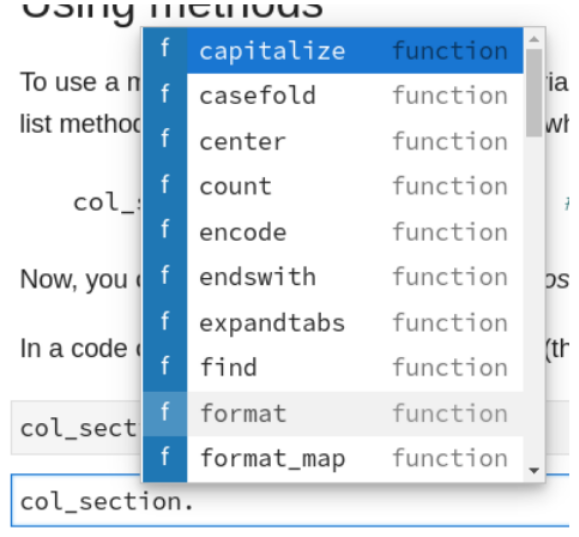

You can click on any of the options and they will auto-complete for you. You can also type it out.

### Discover method parameters (inputs) by using `[Shift]+[Tab]`

Once you have typed the method name, type an open paren `(`, to start "calling" the method, and then press `[Shift]+[Tab]` (together) to see a helpful window on how to use the method.

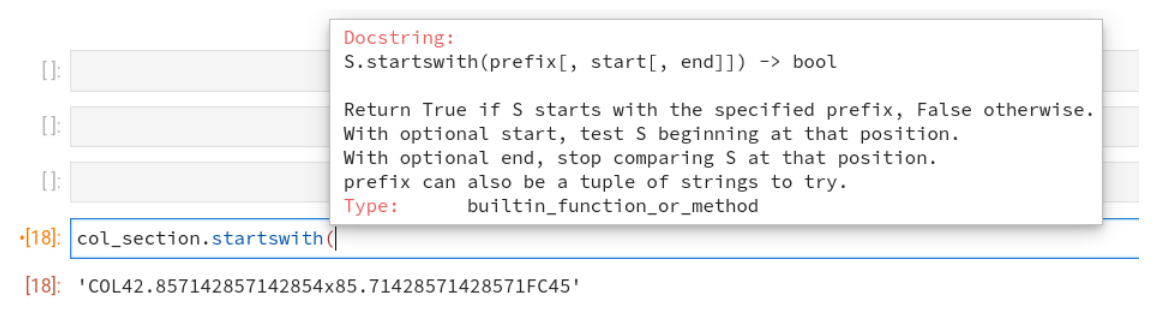

In [ ]:
beam_label.

## `str` methods: An incomplete but useful listing

**Bolded method names are perhaps the most useful to remember.**

| Transformation            | Testing                  | Investigation     | Creating |
| ---------------           | --------------           | ----------------- | ------------------| 
| **`.replace(old=, new=)`** | **`.isnumeric()`**           | `.find(sub_str=)` |`.format(var=)`  
**`.split(sub_str=)`**      |   `.isalpha()`           | `.count(sub_str=)`|    
| **`.strip()`**          | `.isdigit()`            | `.rfind(sub_str=)` | **`.join(iterable=)`** 
|  `.title()`                |   `.islower()`           |                    |    
|               |   `.isupper()`           | 
|  `.lstrip()`                 |  `.startswith(sub_str=)` |  
| `.rstrip()`              |  `.endswith(sub_str=)`   

In [166]:
beam_sections.append('315x836-24fEx')

In [169]:
beam_sections.index('315x836-24fEx')

1

In [171]:
my_beam = '315x836-24fEx'
location_of_my_beam = beam_sections.index(my_beam)
beam_sections[location_of_my_beam]

'315x836-24fEx'

## `list` methods: A complete listing

| Transformation             | Investigation     | Creating/Editing |
| ---------------- | ----------------- | ------------------| 
| **`.reverse()`**     | `.count(item=)`   | **`.append(item=)`**     
| **`.sort()`**        | **`.index(item=)`**   | `.extend(iterable=)`
|                  |                   | **`.insert(item=)`**
|                  |                   | **`.pop(index=)`**
|                  |                   | `.remove(item=)`
|                  |                   | `.clear()`
|                  |                   | `.copy()`

# Examples of useful list methods

* `.append(item)` - Adds an item to the end of the list. This is probably the most used `list` method
* `.insert(index, item)` - Adds an item at the index position
* `.pop(index)` - Remove item at the index position from the list and returns the item

e.g.
```python
my_list = ["col", "beam", "slab"]

my_list.append("arch")
print(my_list) # ["col", "beam", "slab", "arch"]

my_list.insert(1, "cantilever")
print(my_list) # ["col", "cantilever", "beam", "slab", "arch"]

my_list.pop() # without an argument, removes the last item
print(my_list) # ["col", "cantilever", "beam", "slab"]

my_list.pop(0) # Pass an index and the item at that index will be removed from the list
print(my_list) # ["cantilever", "beam", "slab"]

```

In [172]:
my_list = ["col", "beam", "slab"]

In [185]:
my_pop_value = my_list.pop(1)

In [186]:
my_pop_value

'cantilever'

In [187]:
my_list

['col', 'beam', 'stud rail']

## Examples of useful string methods

### `.replace()`

Use `.replace()` to replace a substring within a string with another substring.

e.g.

```python
beam_section = "315x836-24fEx"
beam_section = beam_section.replace("836", "798")
print(beam_section)

# Or...

beam_section = beam_section.replace("Ex", "")
print(beam_section)
```

In [193]:
beam_section = "315x1200-24fEx"
partial_beam_section = beam_section[-5:]
partial_beam_section
new_grade = partial_beam_section.replace("x", "")
new_grade

'24fE'

In [196]:
beam_section.replace("24fEx", new_grade)

'315x836-24fE'

In [191]:
new_beam_section

'315836-24fEx'

### `.split()`

Use `.split()` to split parts of the string up into a `list`. Pass an optional argument to `.split()` to tell it what substring to split on.

Run the code below chunk by chunk to see how it works.

e.g.

```python
beam_section = "315x836-24fEx"
dimensions_grade = beam_section.split('-')
print(dimensions_grade)

dimensions = dimensions_grade[0]
print(dimensions)

width_depth = dimensions.split("x")
print(width_depth)

width = width_depth[0]
depth = width_depth[1]
print(width)
print(depth)
```

In [197]:
beam_section = "315x836-24fEx"
beam_section

'315x836-24fEx'

In [199]:
section_and_grade = beam_section.split('-')

In [200]:
section_and_grade

['315x836', '24fEx']

In [201]:
grade = section_and_grade[1]
section = section_and_grade[0]

In [202]:
new_grade = grade.replace("x", "")

In [204]:
new_beam_section = f"{section}-{new_grade}"

In [205]:
new_beam_section

'315x836-24fE'

## `.strip()`

Use `.strip()` when you want to remove leading and trailing characters from a string. If you give no arguments to `.strip()`, it will remove white space. If you give it any combination of characters, it will _any_ of those characters instead.

e.g.

```python
col_section_raw = "  def  200x622-24fE    df"
col_section_raw.strip() # Removes spaces at the beginning of the string -> 'def  200x622-24fE    df'
col_section_raw.strip('fed ') # Removes the characters f, e, d,  , from the beginning of the string -> '200x622-24fE'
```

In [214]:
col_section_raw = "  def  200x622-24fE    df"

In [215]:
col_section_raw.strip('fed ')

'200x622-24fE'

# Examples: Reading data from a file and manipulating it

Use:
* Methods
* Indexing

Open up the file `beam_0.txt`
```python
file_name = "Text_file_examples/beam_0.txt"
with open(file_name, 'r') as file:
    txt_data = file.read()
txt_data
```

Next, open up the file `300x900c55.cti`
```python
file_name = "Text_file_examples/300x900c55.cti"
with open(file_name, 'r') as file:
    cti_data = file.read()
cti_data
```

In [5]:
file_name = "Text_file_examples/beam_0.txt"
with open(file_name, 'r') as file:
    txt_data = file.read()

In [8]:
lines_of_data = txt_data.split('\n')

In [9]:
length=int(lines_of_data[0])

In [11]:
loads=lines_of_data[2:]

In [12]:
loads

['100, 2000, 0', '200, 1000, -1']

In [19]:
magnitude=int(loads[0][0:3])

In [20]:
magnitude


100

In [6]:
file_name = "Text_file_examples/300x900c55.cti"
with open(file_name, "r") as file:
    cti_data = file.read()
    

In [7]:
lines = cti_data.split('\n')

In [263]:
factored_heading = lines.index('[Factored Loads]')
slenderness_heading = lines.index('[Slenderness: Column]')

2000.0